<a href="https://colab.research.google.com/github/anishdass/Doing_covid/blob/master/lr_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [4]:
df = pd.read_csv('lr_test.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)

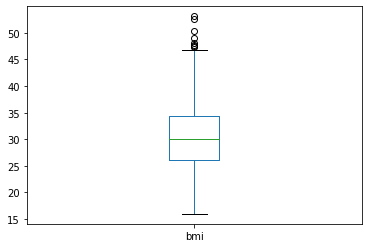

In [14]:
X_train.bmi.plot.box()

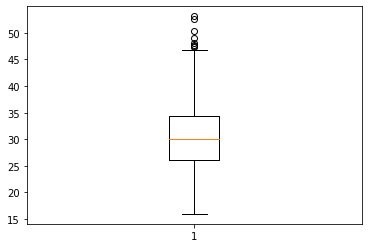

In [18]:
plt.boxplot(X_train.bmi)
plt.show()

In [20]:
q_value = X_train.bmi.quantile(.95)

In [21]:
y_train.value_counts()

1    608
0    462
Name: insuranceclaim, dtype: int64

In [22]:
X_train.head()

,age,sex,bmi,children,smoker,region,charges
1182,25,0,30.30,0,0,3,2632.9920
990,26,0,19.80,1,0,3,3378.9100
123,44,1,31.35,1,1,0,39556.4945
184,44,1,30.69,2,0,2,7731.4271
1167,29,0,24.60,2,0,3,4529.4770


In [29]:
relation = X_train.corr()

In [30]:
print(relation)

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.026319  0.091499  0.061800 -0.012933  0.006400  0.316429
sex      -0.026319  1.000000  0.047436  0.032628  0.074341  0.018674  0.057600
bmi       0.091499  0.047436  1.000000  0.033350  0.005660  0.158037  0.197609
children  0.061800  0.032628  0.033350  1.000000  0.021243  0.027956  0.088766
smoker   -0.012933  0.074341  0.005660  0.021243  1.000000  0.006970  0.778644
region    0.006400  0.018674  0.158037  0.027956  0.006970  1.000000 -0.001329
charges   0.316429  0.057600  0.197609  0.088766  0.778644 -0.001329  1.000000


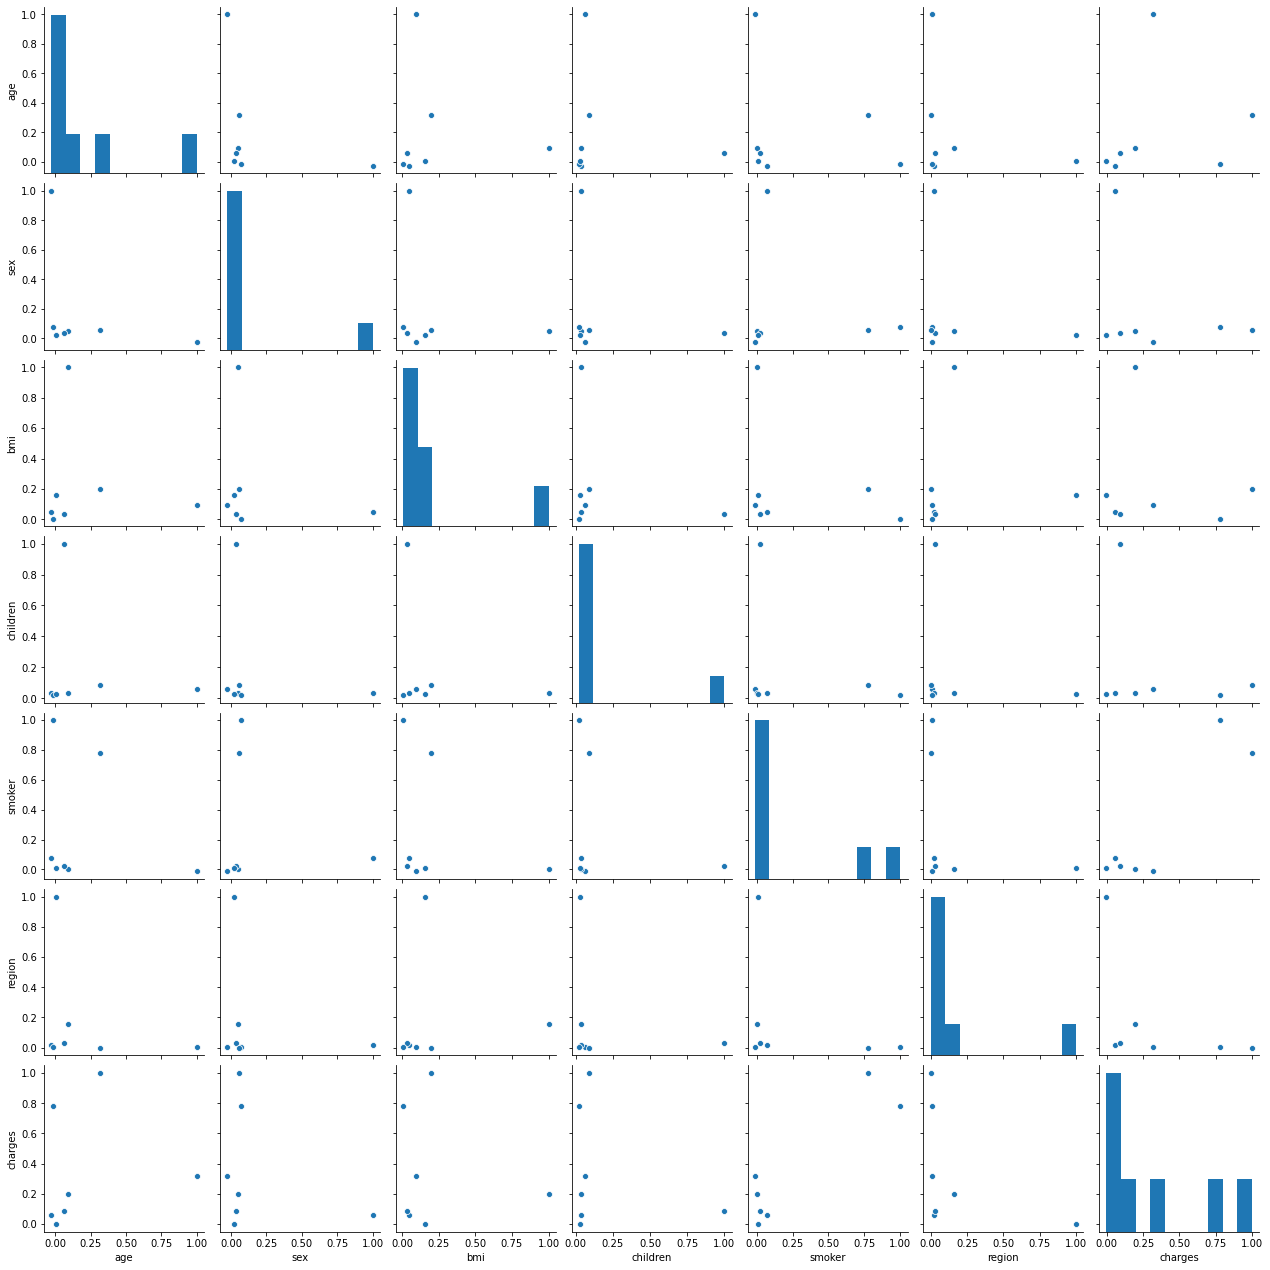

In [33]:
sns.pairplot(relation)

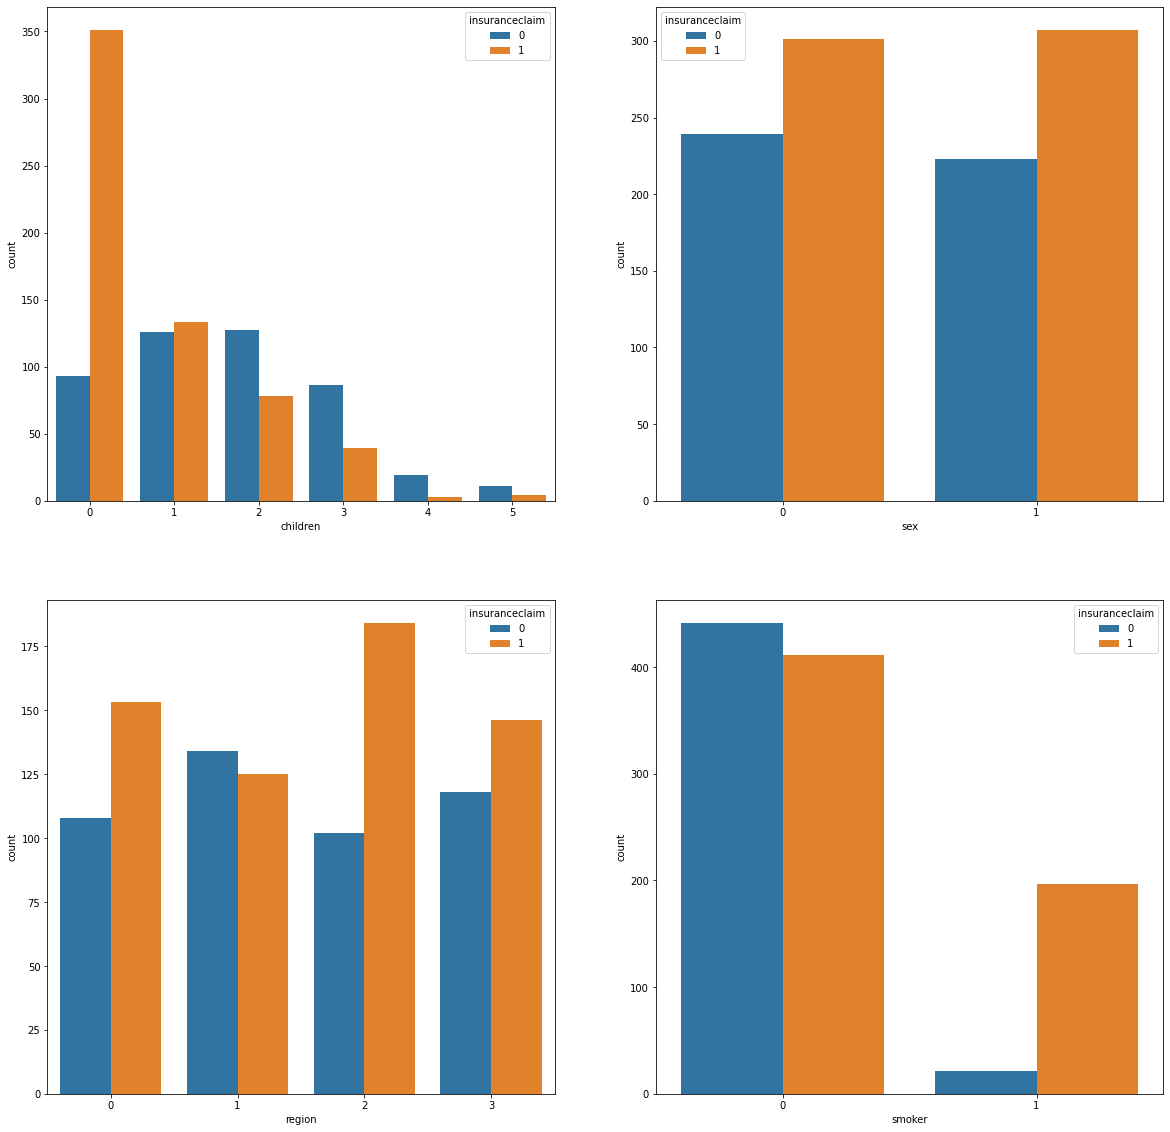

In [88]:
cols = ['children', 'sex', 'region', 'smoker']
fig, axes = plt.subplots(2, 2, figsize= (20, 20))
for i in range(2):
  for j in range(2):
    col = cols[i * 2 + j]
    sns.countplot(x= X_train[col], hue = y_train, ax = axes[i, j])

In [90]:
lr = LogisticRegression()

In [91]:
parameters = {'C':[0.1,0.5,1,5]}

In [95]:
grid = GridSearchCV(estimator = lr, param_grid = parameters)

In [96]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.1, 0.5, 1, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [97]:
y_pred = grid.predict(X_test)

In [99]:
accuracy = accuracy_score(y_pred, y_test)

In [100]:
accuracy

0.8544776119402985

In [102]:
score = roc_auc_score(y_test, y_pred)

In [115]:
score

0.8381874039938556

In [117]:
y_pred_proba = grid.predict_proba(X_test)[:,1]

In [118]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

In [123]:
roc_auc = roc_auc_score(y_test, y_pred_proba)

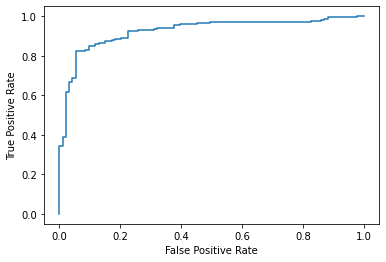

In [128]:
plt.plot(fpr, tpr, label = 'Logistic Model, auc='+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()